In [25]:
from IPython.core.interactiveshell import InteractiveShell  #使所有结果都输出
InteractiveShell.ast_node_interactivity = "all"

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
from xgboost.sklearn import XGBClassifier

In [27]:
import os
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import DataFrame
import xgboost as xgb

In [28]:
df = pd.read_csv('分类1train.csv')
print(df.shape)
df.head()

(1974, 27)


,SMILES,Caco-2,SP-1,WPATH,ECCEN,SP-2,MLFER_L,nBonds,Kier1,MW,...,Kier3,ATSm2,nHeavyAtom,SaaO,SP-0,sumI,VP-1,McGowan_Volume,Kier2,minaaO
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,15.259153,3011,912,13.497779,16.311,35,22.775510,439.218115,...,5.742188,40.498576,31,0.0,21.045395,58.481481,12.755634,3.4104,10.950521,0.0
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,16.259153,3516,976,14.204886,17.309,37,24.683711,467.249415,...,6.611570,42.498576,33,0.0,22.459608,61.481481,13.755634,3.6922,12.300800,0.0
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,16.153000,3542,977,14.473194,17.662,37,24.683711,463.181729,...,6.415683,42.830668,33,0.0,22.622745,68.481481,12.439454,3.4810,11.823145,0.0
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,16.242316,3594,983,14.289206,17.309,37,24.683711,467.249415,...,6.816568,42.498576,33,0.0,22.459608,61.481481,13.738798,3.6922,12.300800,0.0
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,16.242316,3594,983,14.289206,17.334,37,24.683711,461.202465,...,6.816568,42.498576,33,0.0,22.459608,64.314815,12.778290,3.5632,12.300800,0.0


In [29]:
# 准备数据
target = ['SMILES','Caco-2']
X = df.drop(target, axis=1)
y = df['Caco-2']
print(X.shape, y.shape)

(1974, 25) (1974,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
from xgboost.sklearn import XGBClassifier
## 定义 XGBoost模型 
clf = XGBClassifier()
# 在训练集上训练XGBoost模型
clf.fit(X_train, y_train)

[19:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

The accuracy of the Regression is: 0.999366687777074
The accuracy of the Regression is: 0.8658227848101265
The confusion matrix result:
 [[222  26]
 [ 27 120]]


<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 33.0, 'Predicted labels')

Text(51.0, 0.5, 'True labels')

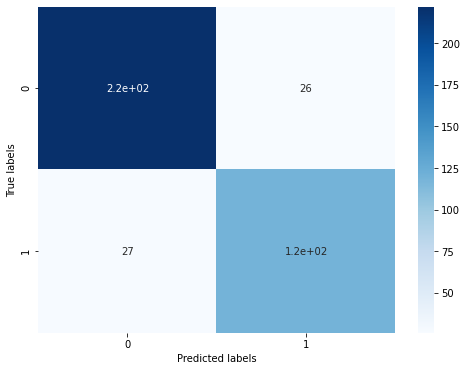

In [31]:
# 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [32]:
test_predict = clf.predict(X_test)
#test_predict
pd.DataFrame(test_predict)   #预测结果

pd.DataFrame(y_test) #Y原本的数据

,0
0,0
1,0
2,0
3,0
4,0
...,...
390,1
391,0
392,0
393,0


,Caco-2
273,0
433,0
277,0
1002,0
1187,0
...,...
733,1
257,0
953,0
1910,0


In [33]:
#根据题目中给定的训练集，进行预测
aa=pd.read_csv('分类1test.csv')
pred=clf.predict(aa)
pred

data1=pd.DataFrame(pred)  #y的预测数据
data1
data1.to_csv("分类变量1的预测结果.csv")

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [23]:
y_train_pred = clf.predict_proba(X_train)[:, 1]
y_test_pred = clf.predict_proba(X_test)[:, 1]

train_roc = roc_curve(y_train, y_train_pred)
test_roc = roc_curve(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

draw_roc_curve(train_roc, test_roc, train_auc, test_auc, clf)

NameError: name 'roc_curve' is not defined

变量二预测

In [55]:
df = pd.read_csv('分类2train.csv')
print(df.shape)

# 准备数据
target = ['SMILES','CYP3A4']
X = df.drop(target, axis=1)
y = df['CYP3A4']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
from xgboost.sklearn import XGBClassifier
## 定义 XGBoost模型 
clf = XGBClassifier()
# 在训练集上训练XGBoost模型
clf.fit(X_train, y_train)

(1974, 22)
(1974, 20) (1974,)
[17:33:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
test_predict = clf.predict(X_test)
#test_predict
pd.DataFrame(test_predict)   #预测结果

,0
0,1
1,1
2,1
3,0
4,1
...,...
390,0
391,1
392,1
393,1


In [57]:
pd.DataFrame(y_test) #Y原本的数据

,CYP3A4
273,1
433,1
277,1
1002,0
1187,1
...,...
733,0
257,1
953,1
1910,1


In [58]:
#根据题目中给定的训练集，进行预测
aa=pd.read_csv('分类2test.csv')
pred=clf.predict(aa)
pred

data1=pd.DataFrame(pred)  #y的预测数据
data1
#data1.to_csv("分类变量2的预测结果.csv")

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


TypeError: can only concatenate str (not "XGBClassifier") to str

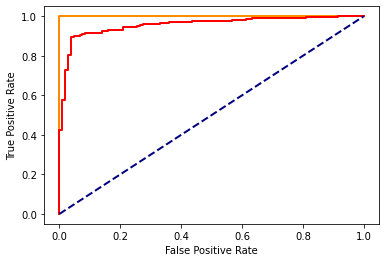

In [59]:
y_train_pred = clf.predict_proba(X_train)[:, 1]
y_test_pred = clf.predict_proba(X_test)[:, 1]

train_roc = roc_curve(y_train, y_train_pred)
test_roc = roc_curve(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

draw_roc_curve(train_roc, test_roc, train_auc, test_auc, clf)

第三个分类变量预测

In [46]:
df = pd.read_csv('分类3train.csv')
print(df.shape)
df.head()
# 准备数据
target = ['SMILES','hERG']
X = df.drop(target, axis=1)
y = df['hERG']
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
from xgboost.sklearn import XGBClassifier
## 定义 XGBoost模型 
clf = XGBClassifier()
# 在训练集上训练XGBoost模型
clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
#test_predict
pd.DataFrame(test_predict)   #预测结果
pd.DataFrame(y_test) #Y原本的数据
#根据题目中给定的训练集，进行预测
aa=pd.read_csv('分类3test.csv')
pred=clf.predict(aa)
pred
data1=pd.DataFrame(pred)  #y的预测数据
data1
#data1.to_csv("分类变量3的预测结果.csv")

(1974, 18)


,SMILES,hERG,VP-0,CrippenMR,VP-1,MLFER_L,WPATH,Kier1,VABC,LipoaffinityIndex,ETA_Beta_s,AMR,Kier2,SP-0,SP-1,ECCEN,bpol,nAtom
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,1,18.98735,122.6000,12.75563,16.311,3011,22.77551,414.7275,11.83095,19.50,126.1188,10.95052,21.04539,15.25915,912,44.16783,64
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,1,20.40156,131.8340,13.75563,17.309,3516,24.68371,449.3194,13.14997,20.50,131.9420,12.30080,22.45961,16.25915,976,48.54066,70
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,1,19.33818,133.3328,12.43945,17.662,3542,24.68371,422.0043,10.57718,20.75,139.9304,11.82314,22.62275,16.15300,977,39.79500,62
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,1,20.40156,131.8340,13.73880,17.309,3594,24.68371,449.3194,13.21277,20.50,133.4822,12.30080,22.45961,16.24232,983,48.54066,70
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,1,19.67543,130.7880,12.77829,17.334,3594,24.68371,430.5101,12.48969,20.50,143.1903,12.30080,22.45961,16.24232,983,41.98142,64


(1974, 16) (1974,)
[17:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

,0
0,1
1,0
2,1
3,1
4,1
...,...
390,0
391,1
392,1
393,1


,hERG
273,1
433,0
277,1
1002,1
1187,1
...,...
733,0
257,1
953,1
1910,1


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1], dtype=int64)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,0
9,1


TypeError: can only concatenate str (not "XGBClassifier") to str

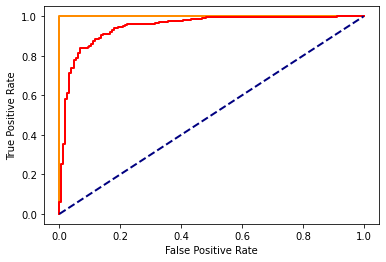

In [47]:
y_train_pred = clf.predict_proba(X_train)[:, 1]
y_test_pred = clf.predict_proba(X_test)[:, 1]

train_roc = roc_curve(y_train, y_train_pred)
test_roc = roc_curve(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

draw_roc_curve(train_roc, test_roc, train_auc, test_auc, clf)

对第四个分类变量预测

In [60]:
df = pd.read_csv('分类4train.csv')
print(df.shape)
df.head()
# 准备数据
target = ['SMILES','HOB']
X = df.drop(target, axis=1)
y = df['HOB']
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
from xgboost.sklearn import XGBClassifier
## 定义 XGBoost模型 
clf = XGBClassifier()
# 在训练集上训练XGBoost模型
clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
#test_predict
pd.DataFrame(test_predict)   #预测结果
pd.DataFrame(y_test) #Y原本的数据
#根据题目中给定的训练集，进行预测
aa=pd.read_csv('分类4test.csv')
pred=clf.predict(aa)
pred
data1=pd.DataFrame(pred)  #y的预测数据
data1
#data1.to_csv("分类变量4的预测结果.csv")

(1974, 12)


,SMILES,HOB,BCUTc-1l,SsOH,maxHsOH,MLFER_A,minsOH,minHsOH,nHsOH,maxsOH,nsOH,SHsOH
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,-0.36053,9.968948,0.469126,0.546,9.968948,0.469126,1,9.968948,1,0.469126
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,-0.36053,10.058950,0.449126,0.546,10.058950,0.449126,1,10.058950,1,0.449126
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,-0.36138,19.730390,0.516534,1.089,9.752886,0.480713,2,9.977508,2,0.997247
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,-0.36053,10.025030,0.456486,0.546,10.025030,0.456486,1,10.025030,1,0.456486
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,-0.36053,9.993342,0.473631,0.546,9.993342,0.473631,1,9.993342,1,0.473631


(1974, 10) (1974,)
[17:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

,0
0,0
1,0
2,0
3,1
4,1
...,...
390,0
391,0
392,0
393,0


,HOB
273,0
433,0
277,0
1002,1
1187,1
...,...
733,0
257,0
953,0
1910,0


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


TypeError: can only concatenate str (not "XGBClassifier") to str

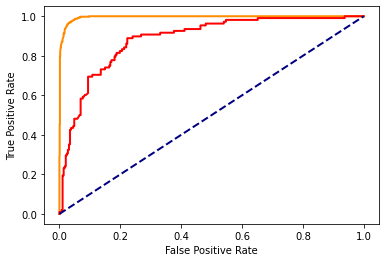

In [61]:
y_train_pred = clf.predict_proba(X_train)[:, 1]
y_test_pred = clf.predict_proba(X_test)[:, 1]

train_roc = roc_curve(y_train, y_train_pred)
test_roc = roc_curve(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

draw_roc_curve(train_roc, test_roc, train_auc, test_auc, clf)

对第五个分类变量预测

In [16]:
df = pd.read_csv('分类5train.csv')
print(df.shape)
df.head()
# 准备数据
target = ['SMILES','MN']
X = df.drop(target, axis=1)
y = df['MN']
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
from xgboost.sklearn import XGBClassifier
## 定义 XGBoost模型 
clf = XGBClassifier()
# 在训练集上训练XGBoost模型
clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
#test_predict
pd.DataFrame(test_predict)   #预测结果
pd.DataFrame(y_test) #Y原本的数据
#根据题目中给定的训练集，进行预测
aa=pd.read_csv('分类5test.csv')
pred=clf.predict(aa)
pred
data1=pd.DataFrame(pred)  #y的预测数据
data1
#data1.to_csv("分类变量5的预测结果.csv")

(1974, 18)


,SMILES,MN,WTPT-5,nHBAcc_Lipinski,ETA_BetaP_s,WTPT-3,minHBa,ETA_dEpsilon_C,ETA_dEpsilon_A,ETA_Epsilon_4,ETA_Epsilon_1,TopoPSA,MLFER_S,nHBAcc,nN,maxsssCH,ETA_EtaP_F,ETA_Eta_F_L
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,3.406628,4,0.62903,15.47144,-1.33130,-0.05631,0.09422,0.50219,0.54010,67.23,2.288,1,1,0.789991,0.66954,5.26590
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,3.406648,4,0.62121,15.48695,-1.37863,-0.05210,0.08590,0.49715,0.53095,67.23,2.288,1,1,0.769158,0.65237,5.26590
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,1,3.406644,5,0.62879,18.01111,-1.60835,-0.06661,0.12806,0.51167,0.57312,87.46,2.901,1,1,0.273861,0.90568,7.46270
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,3.406624,4,0.62121,15.46837,-1.35087,-0.05210,0.08590,0.49715,0.53095,67.23,2.288,1,1,0.850558,0.64765,5.26590
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,3.406624,4,0.62121,15.46837,-1.44969,-0.05210,0.10755,0.49715,0.55260,67.23,2.603,1,1,0.497750,0.84789,7.24809


(1974, 16) (1974,)
[13:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

,0
0,1
1,1
2,0
3,0
4,1
...,...
390,1
391,0
392,1
393,0


,MN
273,1
433,1
277,0
1002,0
1187,1
...,...
733,1
257,0
953,1
1910,0


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0], dtype=int64)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [17]:
test_predict = clf.predict(X_test)
accuracy_score(y_test,test_predict)

0.9443037974683545

In [18]:
Xgbc_auc=roc_auc_score(y_test,test_predict)
Xgbc_auc

0.9101693143812709

In [19]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from numpy.random import random
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def draw_roc_curve(train_pre_proba, test_pre_proba, train_auc, test_auc, model_name):
    fpr, tpr, roc_auc = train_pre_proba
    test_fpr, test_tpr, test_roc_auc = test_pre_proba

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % train_auc)
    plt.plot(test_fpr, test_tpr, color='red',
             lw=lw, label='ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc example ' + model_name)
    plt.legend(loc="lower right")
    plt.show()
    

y_train_pred = clf.predict_proba(X_train)[:, 1]
y_test_pred = clf.predict_proba(X_test)[:, 1]

train_roc = roc_curve(y_train, y_train_pred)
test_roc = roc_curve(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

draw_roc_curve(train_roc, test_roc, train_auc, test_auc, clf)

NameError: name 'roc_curve' is not defined

In [13]:
df = pd.read_csv('分类1train.csv')
print(df.shape)
df.head()

# 准备数据
target = ['SMILES','Caco-2']
X = df.drop(target, axis=1)
y = df['Caco-2']
print(X.shape, y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
from xgboost.sklearn import XGBClassifier
## 定义 XGBoost模型 
clf = XGBClassifier()
# 在训练集上训练XGBoost模型
clf.fit(X_train, y_train)
test_predict = clf.predict(X_test)
#test_predict
pd.DataFrame(test_predict)   #预测结果
pd.DataFrame(y_test) #Y原本的数据
#根据题目中给定的训练集，进行预测
aa=pd.read_csv('分类1test.csv')
pred=clf.predict(aa)
pred
data1=pd.DataFrame(pred)  #y的预测数据
data1
#data1.to_csv("分类变量1的预测结果.csv")

(1974, 25)


,SMILES,Caco-2,SP-1,WPATH,ECCEN,SP-2,MLFER_L,nBonds,Kier1,MW,...,ETA_Beta_s,ETA_Beta,Kier3,ATSm2,nHeavyAtom,SP-0,sumI,VP-1,McGowan_Volume,Kier2
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,15.259153,3011,912,13.497779,16.311,35,22.775510,439.218115,...,19.50,32.50,5.742188,40.498576,31,21.045395,58.481481,12.755634,3.4104,10.950521
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,16.259153,3516,976,14.204886,17.309,37,24.683711,467.249415,...,20.50,33.50,6.611570,42.498576,33,22.459608,61.481481,13.755634,3.6922,12.300800
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,16.153000,3542,977,14.473194,17.662,37,24.683711,463.181729,...,20.75,40.25,6.415683,42.830668,33,22.622745,68.481481,12.439454,3.4810,11.823145
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,16.242316,3594,983,14.289206,17.309,37,24.683711,467.249415,...,20.50,33.50,6.816568,42.498576,33,22.459608,61.481481,13.738798,3.6922,12.300800
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,16.242316,3594,983,14.289206,17.334,37,24.683711,461.202465,...,20.50,39.50,6.816568,42.498576,33,22.459608,64.314815,12.778290,3.5632,12.300800


(1974, 23) (1974,)
[13:34:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

,0
0,0
1,0
2,0
3,0
4,0
...,...
390,1
391,0
392,0
393,0


,Caco-2
273,0
433,0
277,0
1002,0
1187,0
...,...
733,1
257,0
953,0
1910,0


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [14]:
def draw_roc_curve(train_pre_proba, test_pre_proba, train_auc, test_auc, model_name):
    fpr, tpr, roc_auc = train_pre_proba
    test_fpr, test_tpr, test_roc_auc = test_pre_proba

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % train_auc)
    plt.plot(test_fpr, test_tpr, color='red',
             lw=lw, label='ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc example ' + model_name)
    plt.legend(loc="lower right")
    plt.show()
    

y_train_pred = clf.predict_proba(X_train)[:, 1]
y_test_pred = clf.predict_proba(X_test)[:, 1]

train_roc = roc_curve(y_train, y_train_pred)
test_roc = roc_curve(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

draw_roc_curve(train_roc, test_roc, train_auc, test_auc, clf)

NameError: name 'roc_curve' is not defined